In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('diabetes.csv')

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
X = data.drop(columns='Outcome')
y = data.Outcome

In [19]:
import seaborn as sns

In [20]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
from sklearn.model_selection import train_test_split


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

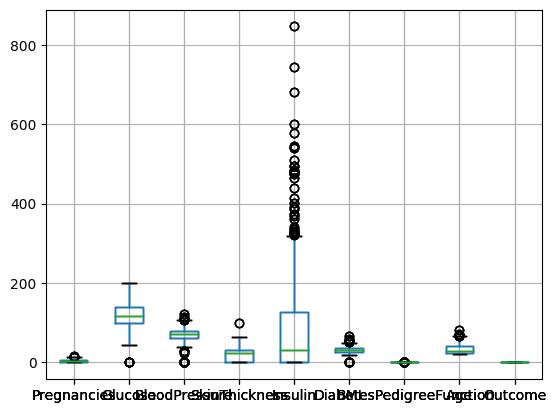

In [34]:
data.boxplot()
plt.show()

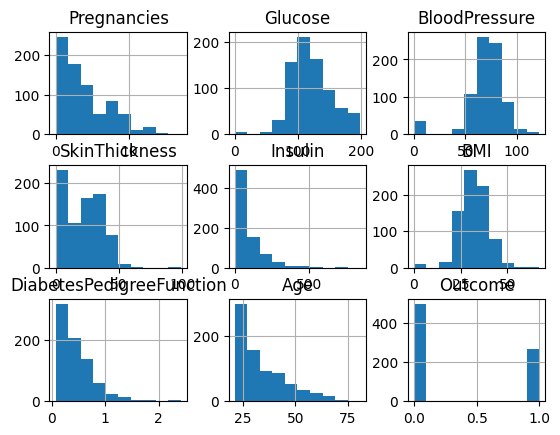

In [38]:
data.hist()
plt.show()

In [41]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [60]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector


In [61]:
rm_scaler2 = make_pipeline(RobustScaler())
mm_scaler2 = make_pipeline(MinMaxScaler())

In [62]:
rm_cols = ['BloodPressure', 'Glucose', 'BMI']
mm_cols = ['Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

In [63]:
preproc_basic = make_column_transformer(
    (rm_scaler2, rm_cols),
    (mm_scaler2, mm_cols),
    remainder='passthrough'
)



In [64]:
preproc_basic

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['BloodPressure', 'Glucose', 'BMI']),
                                ('pipeline-2',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Pregnancies', 'SkinThickness', 'Insulin',
                                  'DiabetesPedigreeFunction', 'Age'])])

In [82]:
X_train_scaled = pd.DataFrame(preproc_basic.fit_transform(X_train))

In [83]:
X_train_scaled

,0,1,2,3,4,5,6,7
0,0.000000,-0.428571,0.750000,0.058824,0.500000,0.021277,0.146102,0.000000
1,0.888889,0.000000,0.284091,0.058824,0.400000,0.171395,0.142094,0.372549
2,-0.666667,-0.476190,-0.431818,0.235294,0.383333,0.000000,0.159911,0.019608
3,0.222222,-0.547619,-0.045455,0.117647,0.300000,0.078014,0.251670,0.039216
4,-0.555556,0.523810,-1.125000,0.000000,0.283333,0.248227,0.054788,0.000000
...,...,...,...,...,...,...,...,...
532,-0.555556,1.380952,0.181818,0.823529,0.500000,0.000000,0.057016,0.333333
533,0.777778,0.285714,0.352273,0.235294,0.333333,0.319149,0.065479,0.039216
534,0.444444,0.071429,1.170455,0.647059,0.616667,0.177305,0.312249,0.529412
535,0.111111,-0.309524,-0.238636,0.352941,0.300000,0.184397,0.284187,0.392157


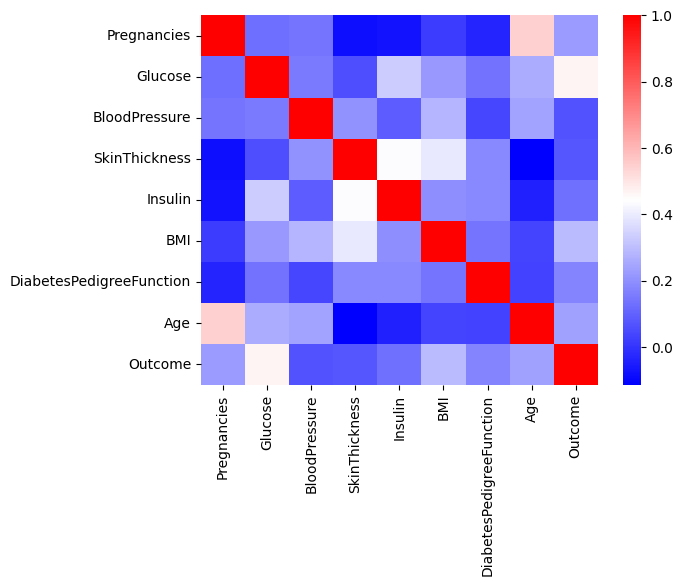

In [72]:

corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "bwr");
plt.show()

In [73]:
corr_df = corr.unstack().reset_index()
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation #want to remove data on diagonal

corr_df.head()

,feature_1,feature_2,correlation
7,Pregnancies,Age,0.544341
63,Age,Pregnancies,0.544341
17,Glucose,Outcome,0.466581
73,Outcome,Glucose,0.466581
39,Insulin,SkinThickness,0.436783


In [76]:
%%time

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel='linear')
cross_val_score(model, new_df, y_train, cv=5).mean()

CPU times: user 58 ms, sys: 28.2 ms, total: 86.2 ms
Wall time: 119 ms


0.7709241952232607

In [77]:
from sklearn.ensemble import RandomForestClassifier


In [85]:

clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [86]:
y_pred=clf.predict(X_test)

/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [92]:

from sklearn.model_selection import cross_validate


cv_results = cross_validate(model, X_train_scaled, y_train,cv=5)


In [93]:
cv_results['test_score'].mean()

0.7709241952232607